In [76]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

In [77]:
# Load data
(X_train, y_train) , (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [78]:
y_train.shape

(50000, 1)

In [79]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [80]:
y_train = y_train.reshape(-1)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [81]:
def image_sample(x, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X_train[index])
    plt.xlabel(classes[y[index]])

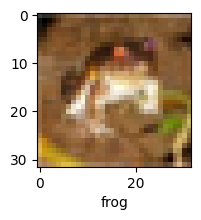

In [82]:
image_sample(X_train, y_train, 0)

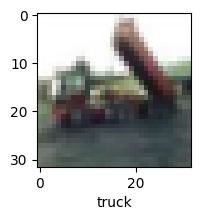

In [83]:
image_sample(X_train, y_train, 2)

In [84]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# X_train[0]


In [85]:
models = tf.keras.models.Sequential([
    # Conv + pool layer
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    # Conv + pool layer
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    # tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    # Flattening
    tf.keras.layers.Flatten(),

    # Full connection
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

In [86]:
models.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [87]:
# Train
models.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.4535 - loss: 1.4996
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.6125 - loss: 1.1005
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.6709 - loss: 0.9452
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7073 - loss: 0.8380
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7343 - loss: 0.7553
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7595 - loss: 0.6907
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7772 - loss: 0.6354
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7942 - loss: 0.5849
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.8081 - loss: 0.5458
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.8241 - loss: 0.4998


In [89]:
models.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7228 - loss: 0.8777


[0.877658486366272, 0.7228000164031982]

In [90]:
y_pred = models.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


array([[1.0180879e-05, 9.1338297e-06, 1.7569093e-06, 9.6706134e-01,
        1.2130630e-05, 3.2473113e-02, 2.7622987e-04, 9.3946903e-07,
        1.4288163e-04, 1.2317136e-05],
       [1.4545175e-05, 8.5722081e-02, 3.5400078e-09, 6.6818750e-08,
        8.7322953e-12, 2.8340947e-09, 2.2186866e-07, 9.0569813e-10,
        9.1409153e-01, 1.7161737e-04],
       [4.5946326e-02, 5.1883322e-01, 2.7326671e-03, 8.9163572e-04,
        2.6596657e-03, 1.2236343e-03, 8.9256384e-04, 5.8299284e-03,
        2.4994698e-01, 1.7104337e-01],
       [9.6755844e-01, 3.8669959e-03, 8.5534446e-04, 5.5596576e-04,
        9.1774476e-05, 3.3643915e-05, 4.2040961e-06, 1.6818356e-05,
        2.3695029e-02, 3.3217072e-03],
       [8.1912908e-08, 4.2262997e-07, 4.2602108e-03, 4.7206660e-03,
        9.3365800e-01, 1.4667099e-04, 5.7208650e-02, 4.3095347e-06,
        7.9449514e-08, 1.0317682e-06]], dtype=float32)

In [92]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(1), np.int64(0), np.int64(4)]

In [96]:
classes[y_classes[2]]

'automobile'

In [97]:
classes[y_classes[5]]

'frog'